In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory data analysis /Data.csv')

In [4]:
df.head()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,%,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production,OP


In [5]:
len(df)

15634

In [6]:
df.shape

(15634, 19)

In [7]:
df.isna().sum()

DATEPRD                        0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [8]:
df=df.drop('DATEPRD',axis=1)

In [9]:
df['AVG_DOWNHOLE_PRESSURE'].fillna(int(df['AVG_DOWNHOLE_PRESSURE'].mean()), inplace=True)
df['AVG_DOWNHOLE_TEMPERATURE'].fillna(int(df['AVG_DOWNHOLE_TEMPERATURE'].mean()), inplace=True)
df['AVG_DP_TUBING'].fillna(int(df['AVG_DP_TUBING'].mean()), inplace=True)


In [10]:
df.isna().sum()

NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [11]:
df=df.drop('AVG_CHOKE_UOM',axis=1)
df.isna().sum()








NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [12]:
df=df.drop('NPD_WELL_BORE_NAME',axis=1)
df.head()


,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,7405,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,WI
1,7405,0.0,181.000,77.000,154.000,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
2,7405,0.0,181.000,77.000,154.000,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
3,7405,0.0,181.000,77.000,154.000,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
4,7405,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production,OP


In [13]:
df.FLOW_KIND[df.FLOW_KIND == 'production'] = 0
df.FLOW_KIND[df.FLOW_KIND == 'injection'] = 1

df.WELL_TYPE[df.WELL_TYPE == 'OP'] = 0
df.WELL_TYPE[df.WELL_TYPE == 'WI'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [14]:
for col in df.columns:
    print(col)

NPD_WELL_BORE_CODE
ON_STREAM_HRS
AVG_DOWNHOLE_PRESSURE
AVG_DOWNHOLE_TEMPERATURE
AVG_DP_TUBING
AVG_ANNULUS_PRESS
AVG_CHOKE_SIZE_P
AVG_WHP_P
AVG_WHT_P
DP_CHOKE_SIZE
BORE_OIL_VOL
BORE_GAS_VOL
BORE_WAT_VOL
BORE_WI_VOL
FLOW_KIND
WELL_TYPE


In [15]:
df.shape

(15634, 16)

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()


,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.054022,NaN,0.0,1.0
1,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.010031,0.000000,0.000000,0.000000,0.0,0.0,0.054022,NaN,0.0,0.0
2,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.009790,0.000000,0.000000,0.000000,0.0,0.0,0.054022,NaN,0.0,0.0
3,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.005458,0.000000,0.000000,0.000000,0.0,0.0,0.054022,NaN,0.0,0.0
4,1.0,0.0,0.780645,0.892850,0.801597,0.0,0.012160,0.241044,0.112074,0.263063,0.0,0.0,0.054022,NaN,0.0,0.0


In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [18]:
df.isna().sum()

NPD_WELL_BORE_CODE          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
BORE_WI_VOL                 0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64

In [19]:
df.head()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.054022,0.0,0.0,1.0
1,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.010031,0.000000,0.000000,0.000000,0.0,0.0,0.054022,0.0,0.0,0.0
2,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.009790,0.000000,0.000000,0.000000,0.0,0.0,0.054022,0.0,0.0,0.0
3,1.0,0.0,0.455244,0.709664,0.445206,0.0,0.005458,0.000000,0.000000,0.000000,0.0,0.0,0.054022,0.0,0.0,0.0
4,1.0,0.0,0.780645,0.892850,0.801597,0.0,0.012160,0.241044,0.112074,0.263063,0.0,0.0,0.054022,0.0,0.0,0.0


In [20]:
df=pd.DataFrame(scaler.inverse_transform(df))


In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7405.0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,1.0
1,7405.0,0.0,181.000,77.000,154.000,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,7405.0,0.0,181.000,77.000,154.000,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,7405.0,0.0,181.000,77.000,154.000,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,7405.0,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.shape

(15634, 16)

In [23]:
df.columns =['NPD_WELL_BORE_CODE','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL','BORE_WI_VOL','FLOW_KIND','WELL_TYPE']

In [24]:
df.head()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,7405.0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,1.0
1,7405.0,0.0,181.000,77.000,154.000,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,7405.0,0.0,181.000,77.000,154.000,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,7405.0,0.0,181.000,77.000,154.000,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,7405.0,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.shape

(15634, 16)

In [26]:
indexNames = df[ df['BORE_WAT_VOL'] < 0 ].index

df.drop(indexNames , inplace=True)



In [27]:
df1 = pd.DataFrame()
df1=df

In [28]:
df.shape

(15630, 16)

In [29]:
df.FLOW_KIND[df.FLOW_KIND == 0] = 'production'
df.FLOW_KIND[df.FLOW_KIND == 1] = 'injection'

df.WELL_TYPE[df.WELL_TYPE == 0] = 'OP'
df.WELL_TYPE[df.WELL_TYPE == 1] = 'WI'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
df.shape

(15630, 16)

In [31]:
#df.to_csv("EDA_SPEF.csv")

In [32]:
#!cp EDA_SPEF.csv drive/My\ Drive/

Data Correlation 

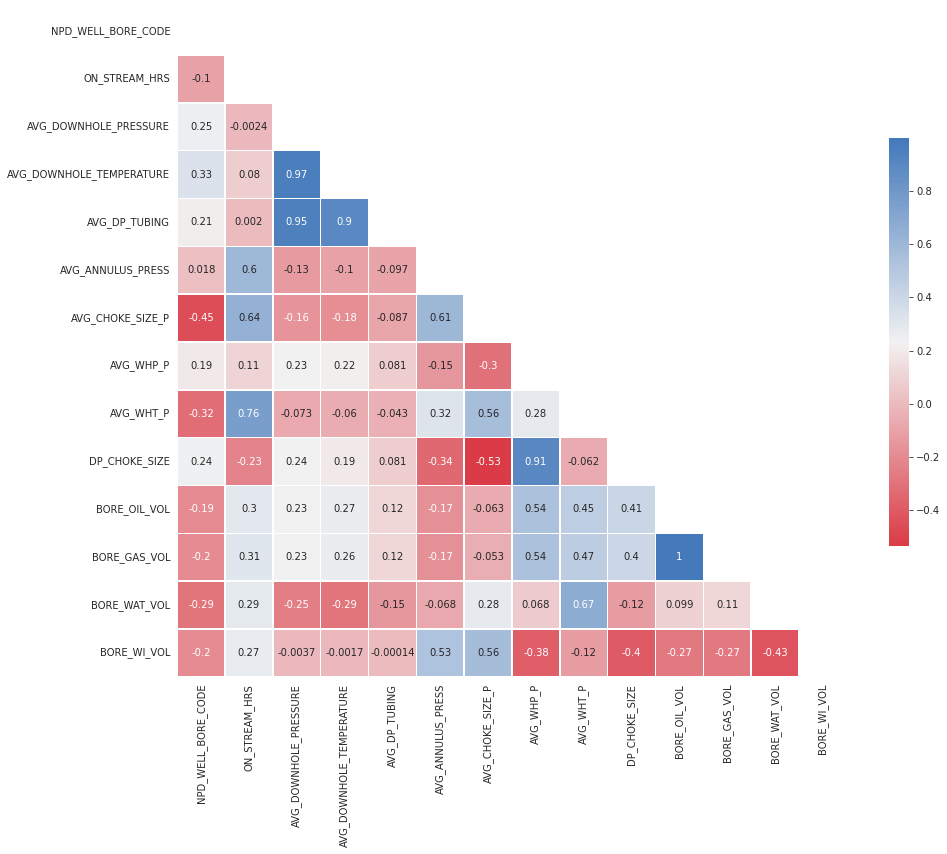

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

corr = df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True)

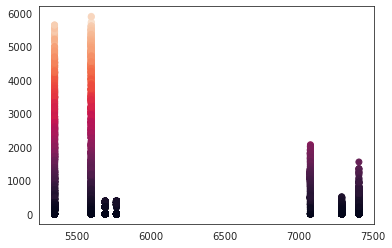

In [34]:
plt.scatter(df.iloc[:,0],df.iloc[:,10],c=df.iloc[:,11])

In [35]:
df.shape

(15630, 16)